In [29]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import interval as ival
import math 

In [30]:
# a - left interval end
# fa - function value at the left end f(a)
# fb - function value at the right end f(b)
# ua - derivative value at the left end f'(d)
# ua - derivative value at the right end f'(d)
# [alp,bet] - interval extension of the derivative on [a,b]
# s - the point of the left convexity change
# t - the point of the right convexity change

a,b,fa,fb,ua,ub,alp,bet,s = symbols('a b fa fb ua ub alp bet s')

In [31]:
tmsv = (ub - ua + alp * (a - b))/(bet - alp)
tms = symbols('tms')
t = s + tms
print(b - t)

b - s - tms


In [32]:
us = ua + alp * (s - a)
ut = us + bet * tms
I1 = 0.5 * (s - a) * (us + ua)
I2 = 0.5 * tms * (ut + us)
I3 = 0.5 * (b - t) * (ub + ut)
I = I1 + I2 + I3

In [33]:
EI = expand(I)
# print(EI)
EF = EI.subs(tms,tmsv)
lineq = EF - (fb - fa)
print(simplify(lineq))

(0.5*a*alp*(alp*(a - b) - ua + ub) - 0.5*alp*s*(alp*(a - b) - ua + ub) - 0.5*b*bet*(alp*(a - b) - ua + ub) + 0.5*bet*s*(alp*(a - b) - ua + ub) - 0.5*ua*(alp*(a - b) - ua + ub) + 0.5*ub*(alp*(a - b) - ua + ub) + (alp - bet)*(0.5*a**2*alp - 0.5*a*alp*b - 0.5*a*alp*s - 1.0*a*ua + 0.5*alp*b*s + 0.5*b*ua + 0.5*b*ub + fa - fb + 0.5*s*ua - 0.5*s*ub))/(alp - bet)


In [34]:
sols = solve(lineq, s)
rs = sols[0]
rss = simplify(rs)
rt = rs + tmsv
rts = simplify(rt)

In [35]:
def quad_min(x, c, fc, uc, l):
    return fc + uc * (x - c) + 0.5 * l * (x - c)**2

In [36]:
def serg_min(x,ss):
    a = ss['a']
    b = ss['b']
    fa = ss['fa']
    fb = ss['fb']
    ua = ss['ua']
    ub = ss['ub']
    alp = ss['alp']
    bet = ss['bet']
    s = ss['s']
    t = ss['t']
    fs = ss['fs']
    us = ss['us']
    ft = ss['ft']
    ut = ss['ut']
#     print("ub = ", ut + (b - t) * alp, "ub = ", ub)
    if x <= s:
        v = quad_min(x, a, fa, ua, alp)
    elif x <= t:
        v = quad_min(x, s, fs, us, bet)
    else:
        v = quad_min(x, t, ft, ut, alp)
    return v
            

In [37]:
def vizual(flist, a, b):
    colors = ['r-', 'b-', 'g-']
    step = (b-a)/100.
    ta = np.arange(a, b + step, step)
    ln = len(ta)
    fta = np.arange(ln).astype(float)
    j = 0
    for f in flist:
        for i in range(ln):
            fta[i] = f(ta[i])
        plt.plot(ta, fta, colors[j])
        j = j + 1
    plt.show()

In [38]:
x = symbols('x')
# ef = cos(x) - x*x
ef = x**4 - 10 * x**3 + 35 * x**2 - 50 * x + 24
edf = diff(ef)
print(edf)
f = lambdify(x, ef)
df = lambdify(x, edf)
idf = lambdify(x, edf, {"cos" : ival.cos, "sin" : ival.sin, "exp" : ival.exp})
# def f(x):
#     return cos(x)
# def df(x):
#     return -sin(x)

4*x**3 - 30*x**2 + 70*x - 50


In [43]:
def make_data(lip = False):
    ss = {}
    ss['a'] = -1
    ss['b'] = 2
    ss['fa'] = f(ss['a'])
    ss['fb'] = f(ss['b'])
    ss['ua'] = df(ss['a'])
    ss['ub'] = df(ss['b'])
    i_x = ival.Interval([ss['a'],ss['b']])
    i_d = idf(i_x)
    if lip:
        ss['alp'] = -max(abs(i_d.x[0]), abs(i_d.x[1]))
        ss['bet'] = max(abs(i_d.x[0]), abs(i_d.x[1]))
    else:
        ss['alp'] = i_d.x[0]
        ss['bet'] = i_d.x[1]    
    subs = [(a,ss['a']), (b,ss['b']), (fa, ss['fa']), (fb, ss['fb']), (ua,ss['ua']), (ub,ss['ub']), (alp,ss['alp']), (bet, ss['bet'])]
    vs = rs.subs(subs)
    ss['s'] = vs
    vt = rt.subs(subs)
    ss['t'] = vt
    fs = quad_min(ss['s'], ss['a'], ss['fa'], ss['ua'], ss['alp'] )
    us = ss['ua'] + (ss['s'] - ss['a']) * ss['alp']
    ss['fs'] = fs
    ss['us'] = us
    ft = quad_min(ss['t'], ss['s'], ss['fs'], ss['us'], ss['bet'])
    ut = ss['us'] + (ss['t'] - ss['s']) * ss['bet']
    ss['ft'] = ft
    ss['ut'] = ut
 
    return ss


In [44]:
ss_glob = make_data()
print(ss_glob)
ss_glob_lip = make_data(True)


{'a': -1, 'b': 2, 'fa': 120, 'fb': 0, 'ua': -154, 'ub': 2, 'alp': -244, 'bet': 122, 's': -0.834736375719982, 't': 1.59149313247674, 'fs': 91.2173298686369, 'us': -194.324324324324, 'ft': -21.1761127543139, 'ut': 101.675675675676}


In [45]:
def fmin(x):
    return serg_min(x,ss_glob)
   
def fmin_lip(x):
    return serg_min(x,ss_glob_lip)
    
    
    

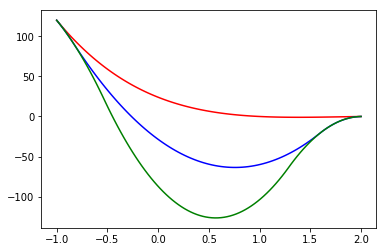

In [46]:
vizual([f,fmin, fmin_lip], ss_glob['a'], ss_glob['b'])